In [1]:
import pandas as pd
df=pd.read_csv("day - day.csv")

In [2]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day.astype(int)
df['month'] = df['dteday'].dt.month.astype(int)
df['year'] = df['dteday'].dt.year.astype(int)

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27,12,2012
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28,12,2012
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29,12,2012
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30,12,2012


In [5]:
cols_drop=['instant','yr','mnth',"atemp","dteday","day","month"]
df=df.drop(columns=cols_drop)

<Axes: >

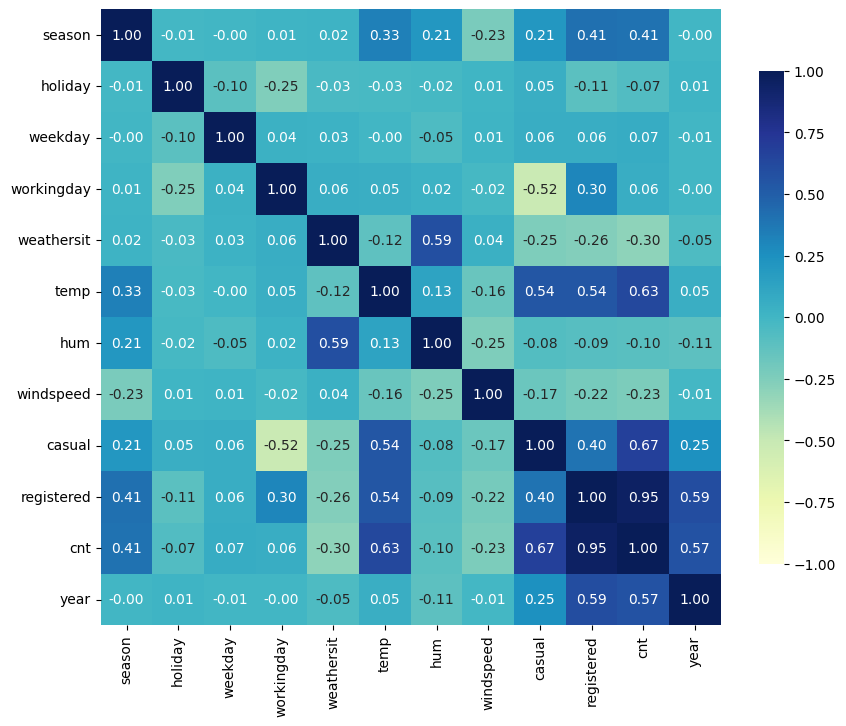

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    vmin=-1, 
    vmax=1,
    cbar_kws={"shrink": 0.8}
)

In [7]:
X=df.drop(columns=["casual","registered","cnt"])
y_casual=df["casual"]
y_registered=df["registered"]

In [8]:
from sklearn.model_selection import train_test_split

# Split ONCE so that train/test indices are the same for both targets
X_train, X_test, y_train_casual, y_test_casual, y_train_registered, y_test_registered = train_test_split(
    X, y_casual, y_registered, test_size=0.2, random_state=43
)

In [9]:
X

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,year
0,1,0,6,0,2,0.344167,0.805833,0.160446,2011
1,1,0,0,0,2,0.363478,0.696087,0.248539,2011
2,1,0,1,1,1,0.196364,0.437273,0.248309,2011
3,1,0,2,1,1,0.200000,0.590435,0.160296,2011
4,1,0,3,1,1,0.226957,0.436957,0.186900,2011
...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.652917,0.350133,2012
727,1,0,5,1,2,0.253333,0.590000,0.155471,2012
728,1,0,6,0,2,0.253333,0.752917,0.124383,2012
729,1,0,0,0,1,0.255833,0.483333,0.350754,2012


In [10]:
from sklearn.model_selection import train_test_split
# Create Column Transformer with 3 types of transformers

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, [0,2,4]),
        ("StandardScaler", numeric_transformer, [5,6,7])
        
    ],remainder='passthrough'
    
)

In [11]:
X_train=preprocessor.fit_transform(X_train)

In [12]:
X_test=preprocessor.transform(X_test)


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor()
}

# Step 3: Train & evaluate for casual + registered
for name, model in models.items():
    # Train casual model
    model_casual = model
    model_casual.fit(X_train, y_train_casual)
    pred_casual_train = model_casual.predict(X_train)
    pred_casual_test = model_casual.predict(X_test)

    # Train registered model (clone to avoid overwrite)
    model_registered = type(model)()
    model_registered.fit(X_train, y_train_registered)
    pred_registered_train = model_registered.predict(X_train)
    pred_registered_test = model_registered.predict(X_test)

    # Combine predictions
    pred_cnt_train = pred_casual_train + pred_registered_train
    pred_cnt_test = pred_casual_test + pred_registered_test

    # Evaluate
    mae_train, rmse_train, r2_train = evaluate_model(df.loc[y_train_casual.index, "cnt"], pred_cnt_train)
    mae_test, rmse_test, r2_test = evaluate_model(df.loc[y_test_casual.index, "cnt"], pred_cnt_test)

    print(name)
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {rmse_train:.4f}")
    print(f"- Mean Absolute Error: {mae_train:.4f}")
    print(f"- R2 Score: {r2_train:.4f}")
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {rmse_test:.4f}")
    print(f"- Mean Absolute Error: {mae_test:.4f}")
    print(f"- R2 Score: {r2_test:.4f}")
    print("=" * 35, "\n")

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 814.6838
- Mean Absolute Error: 588.5911
- R2 Score: 0.8235
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 769.1878
- Mean Absolute Error: 585.9973
- R2 Score: 0.8399

Lasso
Model performance for Training set
- Root Mean Squared Error: 815.1788
- Mean Absolute Error: 588.6787
- R2 Score: 0.8233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 771.8041
- Mean Absolute Error: 589.9484
- R2 Score: 0.8388

Ridge
Model performance for Training set
- Root Mean Squared Error: 815.2504
- Mean Absolute Error: 588.9595
- R2 Score: 0.8233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 773.2434
- Mean Absolute Error: 591.6849
- R2 Score: 0.8382

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 777.4187
- Mean Absolute Error: 601.1336
- R2 Score: 0.839